In [1]:
import intake
import os.path
import xarray as xr
from utils import plotter
from analogs import calculate_analogs, load_LENS_dataset, print_analog_stats, plot_analog_validation

In [2]:
lat, lon = 33.1072795,35.4688208
URL = "/home/jhexr/code/clustering_analogs/aws-cesm1-le.json"
if not os.path.isfile(URL):
    URL = "https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/\
        catalogs/aws-cesm1-le.json"

In [3]:
LENS_dataset = load_LENS_dataset(URL)
curr_analogs = calculate_analogs(LENS_dataset, lat, lon, ['TREFHT', 'PRECC'], LENS_dataset, '2000-01-01', '2009-12-31', '2000-01-01', '2009-12-31')
curr_analogs = curr_analogs.load()
print("Done")


--&gt; The keys in the returned dictionary of datasets are constructed as follows:
	&#39;component.experiment.frequency&#39;


&lt;IPython.core.display.HTML object&gt;


Dataset dictionary keys:
 dict_keys([&#39;atm.HIST.monthly&#39;, &#39;atm.20C.monthly&#39;, &#39;atm.RCP85.monthly&#39;])
Done


Create weight file: nearest_s2d_720x1440_192x288.nc
using dimensions (&#39;lat&#39;, &#39;lon&#39;) from data variable lsmask as the horizontal dimensions for this dataset.


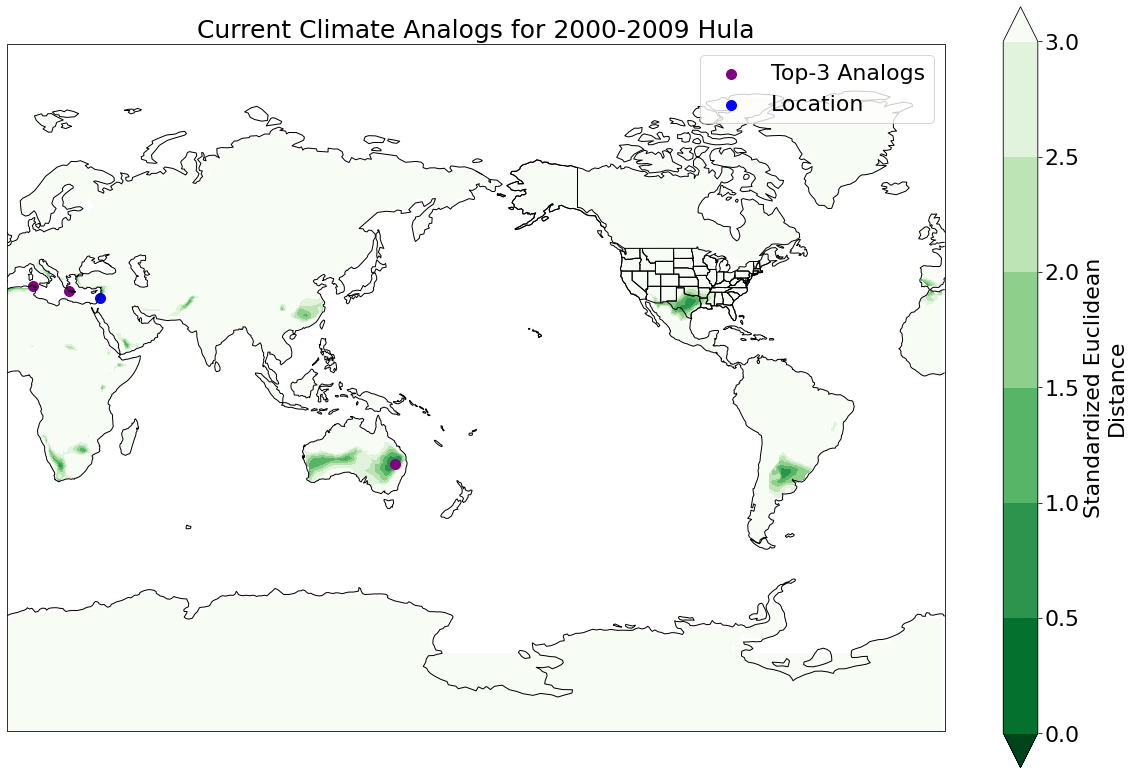

In [6]:
curr_distances = curr_analogs['Standardized Euclidean Distance'].mean(dim='member_id')
top_K_coords = plotter(curr_distances, 'Greens_r', 'Current Climate Analogs for 2000-2009 Hula', 0, 3, 3, location=(lon, lat))